In [1]:
import sys

sys.path.insert(0, '../src')

from pysycomp import *

import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Position, q / Å')

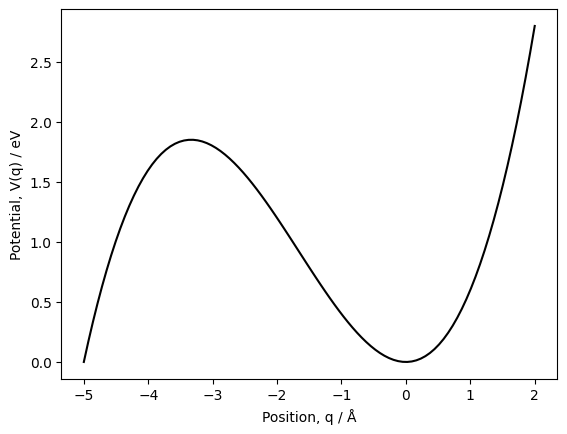

In [328]:
q = np.linspace(-5, 2, 100) # Angstrom


v = (q**2/2 + 0.1*q**3)

plt.plot(q, v, "k")
plt.ylabel("Potential, V(q) / eV")
plt.xlabel("Position, q / Å")

In [14]:
q = Symbol("q")

potential_sym = (q**2/2 + 0.1*q**3)

In [521]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")
pq_s = Symbol("pq_s")
q2 = Symbol("q2")

q_0 = 0.0

alp = alpha
aux = f(q)

q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))

p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = sympify(p1)*0.5*dt + p
p1 = str(p1).replace("q**2", "q2")
print("p = " + str(p1))

p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = p21*0.5*dt + p2
p21 = str(p21).replace("q**2", "q2")
print("p2 = " + str(p21))

pq_s1 = str(time_deriv(p*q, 1)).replace("v(q)", str(potential_sym))
pq_s1 = sympify(p21).doit()
pq_s1 = pq_s1*0.5*dt + pq_s
pq_s1 = str(pq_s1).replace("q**2", "q2")
pq_s1 = str(pq_s1)
print("pq_s = " + pq_s1)

q21 = str(time_deriv(q, 2))
q21 = q21.replace("p*q", "pq_s")
q21 = sympify(q21)*0.5*dt + q2
q21 = str(q21)
print("q2 = " + q21)

## NEED CHANGE OF VARIABLE

q = dt*p/mass + q
p = dt*(-0.15*q2 - 0.5*q) + p
p2 = dt*(-0.3*p*q2 - 1.0*p*q) + p2
pq_s = dt*(0.5*dt*(-1.0*p*q - 0.3*p*q2) + 0.5*p2) + pq_s
q2 = 1.0*dt*pq_s/mass + q2


In [522]:
##### Constants #####

hbar = 0.6582  # eV * fs
convert = (1.0/17.586)

# Feel free to change any of the below parameters to observe what happens when you change them
mass = 1 #1*2980.0*convert
q0 = 1
p0 = -1.0
s0 = 0.05
ps0 = 0.0
pq_s = 0.0
alp = 2.567
alpha = alp

dt = 0.1
D = 4.419

In [523]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 1.75
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 1.0
q2 = q*q + s0*s0
pq_s = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2


q2 = eval(q21)
pq_s = eval(pq_s1)
p2 = eval(p21)
p = eval(p1)
q = eval(q1)
p = eval(p1)
p2 = eval(p21)
pq_s = eval(pq_s1)
q2 = eval(q21)


In [524]:
##### Empty Lists for Data Storage: #####

q_list = [] 
p_list = []

In [525]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

### Compute the x values ###

dt = 0.1 # step size
t_i = 0.0 # start
t_f = 1000 # finish

#### --- Do Not Change Anything Below --- #####

### Compute the y values ###

while t_i<=t_f:
    
    q2 = eval(q21)
    pq_s = eval(pq_s1)
    p2 = eval(p21)
    p = eval(p1)
    q = eval(q1)
    p = eval(p1)
    p2 = eval(p21)
    pq_s = eval(pq_s1)
    q2 = eval(q21)

    t_i = t_i + dt

##### --- #####

    # Here is where you add the lists to store data
    
    q_list.append(q)
    p_list.append(p)
        
### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
Total runtime is 1.8320977687835693


In [528]:
### Define the x values ###

x_list = np.arange(0.0, t_f, 0.1)

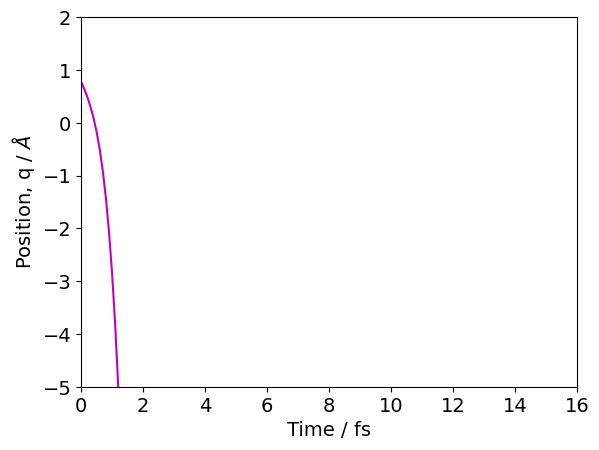

In [529]:
plt.plot(x_list, q_list, 'm')
plt.xlim(0, 16)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Position, q / $\AA$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1)
plt.ylim(-5, 2)
#plt.savefig("morse_qvt.png")
plt.show()

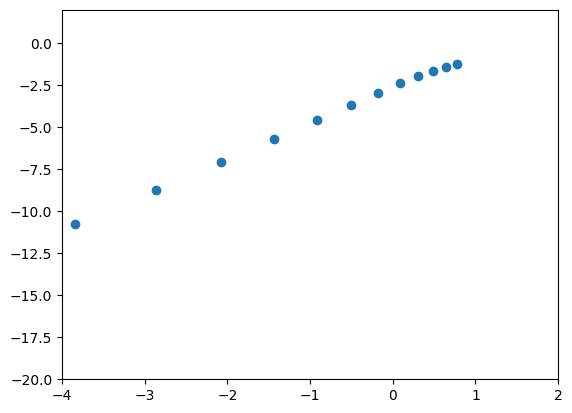

In [530]:
plt.plot(q_list, p_list, "o")
plt.ylim(-20, 2)
plt.xlim(-4, 2)

# Classical Equations of Motion

In [531]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")
pq_s = Symbol("pq_s")
q2 = Symbol("q2")

q_0 = 0.0

alp = alpha
aux = f(q)

q1 = str(time_deriv(q, 1)*dt + q)
print("q = " + str(q1))

p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))
p1 = expand(sympify(p1).doit())
p1 = sympify(p1)*0.5*dt + p
p1 = str(p1)#.replace("q**2", "q2")
print("p = " + str(p1))

p21 = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))
p21 = expand(sympify(p21).doit())
p21 = p21*0.5*dt + p2
p21 = str(p21).replace("q**2", "q2")
print("p2 = " + str(p21))

pq_s1 = str(time_deriv(p*q, 1)).replace("v(q)", str(potential_sym))
pq_s1 = sympify(p21).doit()
pq_s1 = pq_s1*0.5*dt + pq_s
pq_s1 = str(pq_s1).replace("q**2", "q2")
pq_s1 = str(pq_s1)
print("pq_s = " + pq_s1)

q21 = str(time_deriv(q, 2))
q21 = q21.replace("p*q", "pq_s")
q21 = sympify(q21)*0.5*dt + q2
q21 = str(q21)
print("q2 = " + q21)

## NEED CHANGE OF VARIABLE

q = dt*p/mass + q
p = dt*(-0.15*q**2 - 0.5*q) + p
p2 = dt*(-0.3*p*q2 - 1.0*p*q) + p2
pq_s = dt*(0.5*dt*(-1.0*p*q - 0.3*p*q2) + 0.5*p2) + pq_s
q2 = 1.0*dt*pq_s/mass + q2


In [532]:
##### Constants #####

hbar = 0.6582  # eV * fs
convert = (1.0/17.586)

# Feel free to change any of the below parameters to observe what happens when you change them
mass = 1#2980.0*convert
q0 = 1
p0 = -1.0
s0 = 0.05
ps0 = 0.0
pq_s = 0.0
alp = 2.567
alpha = alp

dt = 0.1
D = 4.419

In [533]:
##### Initial Conditions (Do Not Change) #####

t = 0.0    
Etot = 1.75
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q_0 = 0.0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

q2 = eval(q21)
pq_s = eval(pq_s1)
p2 = eval(p21)
p = eval(p1)
q = eval(q1)
p = eval(p1)
p2 = eval(p21)
pq_s = eval(pq_s1)
q2 = eval(q21)


In [534]:
##### Empty Lists for Data Storage: #####

q_list_classical = [] 
p_list_classical = []

In [535]:
### Time how long it takes to compute ###

import time 
begin = time.time()
print("Loading...")

### Compute the x values ###

dt = 0.1 # step size
t_i = 0.0 # start
t_f = 1000 # finish

#### --- Do Not Change Anything Below --- #####

### Compute the y values ###

while t_i<=t_f:
    
#    q2 = eval(q21)
#    pq_s = eval(pq_s1)
#    p2 = eval(p21)
    p = eval(p1)
    q = eval(q1)
    p = eval(p1)
#    p2 = eval(p21)
#    pq_s = eval(pq_s1)
#    q2 = eval(q21)
    
    print(q)

    t_i = t_i + dt

##### --- #####

    # Here is where you add the lists to store data
    
    q_list_classical.append(q)
    p_list_classical.append(p)
        
### Compute the end time ###
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Loading...
0.77566997325
0.648278255045295
0.5131429602022434
0.3720862886643539
0.22689340962118484
0.07927715462381538
-0.06915072652152798
-0.21690144587059143
-0.3626242894726112
-0.5051153793058515
-0.6433207399852672
-0.7763344779883157
-0.9033929568766212
-1.0238658626997634
-1.1372450138103138
-1.2431316934470704
-1.3412231853711138
-1.4312990843403774
-1.5132078436727379
-1.5868539185028292
-1.6521857702238956
-1.709184917700714
-1.7578561552492118
-1.7982190060328602
-1.8303004415371535
-1.8541288717449487
-1.869729394854409
-1.8771202880452729
-1.8763107200830575
-1.8672996706749074
-1.8500760487403163
-1.8246200104766896
-1.790905486656192
-1.7489039353555382
-1.6985893396266354
-1.639944467735546
-1.5729684047388701
-1.497685346501726
-1.4141546189909424
-1.3224818451494897
-1.2228311275487922
-1.1154380465721134
-1.0006231912369354
-0.8788058443019116
-0.7505173380598061
-0.6164134872612879
-0.47728539835198946
-0.3340678595136113
-0.187844446084377
-0.039848444802073196


Total runtime is 1.3003242015838623


In [538]:
### Define the x values ###

x_list = np.arange(0.0, t_f, 0.1)
x_list1 = np.arange(0.0, t_f, 0.1)

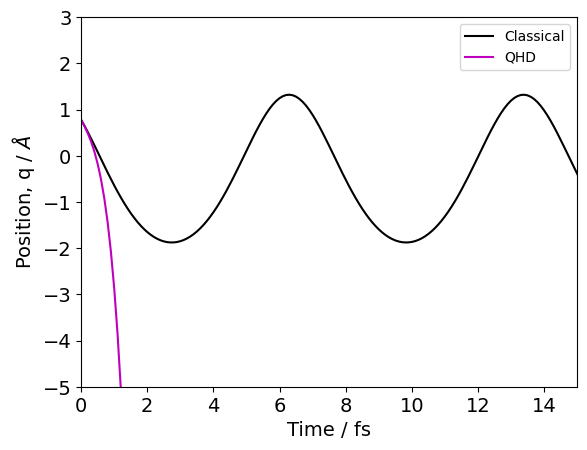

In [539]:
plt.plot(x_list, q_list_classical, 'k')
plt.plot(x_list1, q_list, 'm')
plt.xlim(0, 15)
plt.xlabel("Time / fs", fontsize=14)
plt.ylabel("Position, q / $\AA$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(["Classical", "QHD"])

plt.ylim(-5, 3)
#plt.savefig("morse_qvt.png")
plt.show()

In [ ]:
plt.plot(q_list_classical, p_list_classical, "k")
plt.plot(q_list, p_list, "m")
plt.ylim(-5, 2)
plt.xlim(-2, 2)